# Representation-Segment Algebra

The purpose of this code is to create a small environment which allows for the representation and algebraic manipulation of elements of the Grothendeick group $\mathscr{R}$ in terms of its basis of segments, $\langle a\rangle$, $a \in \mathcal{O}$.

In [4]:
class Segment:
    """
    A class used to symbolically represent a segment of cuspidal representations

    ...

    Attributes
    ----------
    seg_lower : float
        an integer (or half integer) describing the lower bound of the segment
    seg_upper : float
        an integer (or half integer) describing the upper bound of the segment
    seg_empty : bool
        a boolean specifying if the segment is empty or not

    Methods
    -------
    is_empty()
        Returns if the segment is empty or not
    get_segment_lower()
        Returns the lower value of the segment
    get_segment_upper()
        Returns the upper value of the segment
    contains_seg(input_seg)
        Returns if the inputted segment is contained inside the current segment.
    contains(value)
        Returns if the inputted value is contained inside the current segment.
    linked(input_seg)
        Returns if the inputted segment is linked with the current segment.
    precedes(input_seg)
        Returns if the inputted segment is linked with the current segment.
    subtract()
        Reduces the upper bound of the segment by 1. If the upper bound
        goes below the lower bound, set the segment as empty.
    intersect(other)
        Returns a new segment which is the intersection of 
        the current segment and the inputted segment
    union(other)
        Returns a new segment which is the union of 
        the current segment and the inputted segment
    string_format()
        Defines a string representing the segment as a segment of representations with base cuspidal representation rho
        and character nu.
    """
    
    def __init__(self, i, j, empty = False):
        """
        Initializes the segment and its upper and lower bounds
        
        Parameters
        ----------
        i : float
            an integer (or half integer) for the lower bound of the segment
        j : float
            an integer (or half integer) for the upper bound of the segment
        empty : bool, optional
            a boolean to specify if the segment is empty or not

        Raises
        ------
        ValueError
            If the lower bound, i, is greater than the upper bound, j
        """
        
        # If i <= j storing i and j as upper and lower bounds
        if i <= j:
            self.seg_lower = i
            self.seg_upper = j
            self.empty = empty
        else: # Else raise value error
            raise ValueError("The first argument must be less than the second")
    
    def __eq__(self, other):
        """
        Defines when two segments are equal
        
        Parameters
        ----------
        other : segment
            the segment being compared with

        Raises
        ------
        NotImplemented
            If the input, other, is not a segment
        """
        
        # Two segments are equal if they have the same upper and lower bound
        if other.get_segment_lower() == self.seg_lower and other.get_segment_upper() == self.seg_upper:
            return True
        else:
            return False
    
    
    def __ne__(self, other):
        """
        Defines when two segments are not equal
        
        Parameters
        ----------
        other : segment
            the segment being compared with

        Raises
        ------
        NotImplemented
            If the input, other, is not a segment
        """
        
        return not self.__eq__(other)
    
    
    def __hash__(self):
        """
        Defines the hash for a segment using the hash of a tuple
        """
        return hash((self.seg_lower, self.seg_upper))
    
    def is_empty(self):
        """
        Returns if the segment is empty or not
        """
        return self.empty
    
    def get_segment_lower(self):
        """
        Returns the lower value of the segment
        """
        return self.seg_lower
    
    def get_segment_upper(self):
        """
        Returns the upper value of the segment
        """
        return self.seg_upper
    
    def contains_seg(self, input_seg):
        """
        Returns if the inputted segment is contained inside the current segment.
        
        Parameters
        ----------
        input_seg : segment
            the segment being compared with
        """
        
        # Initialize the upper and lower bounds of the input segment
        input_low = input_seg.get_segment_lower()
        input_high = input_seg.get_segment_upper()
        
        # If the lower bound of the inputted segment is greater than the lower bound
        # of the current segment and the upper bound of the inputted segment is less than
        # the upper bound of the current segment
        if self.seg_lower <= input_low and self.seg_upper >= input_high:
            return True
        else:
            return False
        
    def contains(self, value):
        """
        Returns if the inputted value is contained inside the current segment.
        
        Parameters
        ----------
        value : float
            the value being checked
        """
        # Checks if the value is of the same type as the bounds of the segment, and is contained within them
        if value >= self.seg_lower and value <= self.seg_lower and (value-self.seg_lower == floor(value-self.seg_lower)):
            return True
        else:
            return False
    
    def linked(self, input_seg):
        """
        Returns if the inputted segment is linked with the current segment.
        
        Parameters
        ----------
        input_seg : segment
            the segment being compared with
        """
        
        # Initialize the upper and lower bounds of the input segment
        input_low = input_seg.get_segment_lower()
        input_high = input_seg.get_segment_upper()
        
        # The segments are linked iff one precedes the other
        if self.precedes(input_seg) or input_seg.precedes(self):
            return True
        else:
            return False
        
    def precedes(self, input_seg):
        """
        Returns if the inputted segment is linked with the current segment.
        
        Parameters
        ----------
        input_seg : segment
            the segment being compared with
        """
        
        # Initialize the upper and lower bounds of the input segment
        input_low = input_seg.get_segment_lower()
        input_high = input_seg.get_segment_upper()
        
        # The current segment precedes the input if its lower bound is less than the input's, its upper bound is 
        # at most one less than the input's lower bound and less than the input's upper bound.
        if input_low > self.seg_lower and input_low <= self.seg_upper+1 and input_high > self.seg_upper:
            return True
        else:
            return False
    
    def subtract(self):
        """
        Reduces the upper bound of the segment by 1. If the upper bound
        goes below the lower bound, set the segment as empty.
        """
        
        # If the segment is not empty reduce its upper bound and check 
        # if the upper bound is now less than than the lower bound
        if not self.empty:
            self.seg_upper = self.seg_upper - 1
            if self.seg_upper < self.seg_lower:
                self.empty = True
                self.seg_upper, self.seg_lower = 0, 0
    
    
    def intersect(self, other):
        """
        Returns a new segment which is the intersection of 
        the current segment and the inputted segment
        
        Parameters
        ----------
        other : segment
            the segment being intersected with
        """
        
        # Sets the lower bound of the new segment to be the max of the two lower bounds of the inputted segments
        lower = max(self.seg_lower, other.get_segment_lower())
        
        # Sets the upper bound of the new segment to be the min of the two upper bounds of the inputted segments
        upper = min(self.seg_upper, other.get_segment_upper())
        
        # If lower > upper return the empty segment
        if lower > upper:
            return Segment(0, 0, empty = True)
        else: # Else return the segment with lower and upper as the bounds
            return Segment(lower, upper)
    
    def union(self, other):
        """
        Returns a new segment which is the union of 
        the current segment and the inputted segment
        
        Parameters
        ----------
        other : segment
            the segment being unioned with
        """
        
        # Sets the lower bound of the new segment to be the min of the two lower bounds of the inputted segments
        lower = min(self.seg_lower, other.get_segment_lower())
        
        # Sets the upper bound of the new segment to be the max of the two upper bounds of the inputted segments
        upper = max(self.seg_upper, other.get_segment_upper())
        
        # Returned the unioned segment
        return Segment(lower, upper)
    
    def __repr__(self):
        """
        Represent a segment as an interval with lower and upper bounds
        """
        return f"[{self.seg_lower}, {self.seg_upper}]"
    
    def string_format(self):
        """
        Defines a string representing the segment as a segment of representations with base cuspidal representation rho
        and character nu.
        """
        # Use Sage Latex expressions to define string
        si = f"{self.seg_lower}"
        sj = f"{self.seg_upper}"
        s="[" + LatexExpr(r"\nu^{" + si + r"}\rho") + "," + LatexExpr(r"\nu^{" + sj + r"}\rho") + "]"
        return s
    
    def __str__(self):
        """
        Shows the string representation of the segment when asked to print it
        """
        show(self.string_format())
        return ""

In [5]:
class Multisegment:
    """
    A class used to symbolically represent a multisegment of cuspidal representations

    ...

    Attributes
    ----------
    multi : dict
        a dictionary for storing the segments in our multisegments and their multiplicity
    ordering : list
        a list for storing the ordering of our segments
    less_thans_computed : bool
        a boolean specifying if the less_thans list has been computed for this multisegment
    less_thans : list
        a list of all multisegments less than the current multisegment
    rel : list
        a list of pairs of multisegments in less_thans describing the order relation between them

    Methods
    -------
    is_empty()
        Returns if the segment is empty or not
    """
    def __init__(self, index_array, segs = False):
        """
        Initializes the multisegment and its segment components
        
        Parameters
        ----------
        index_array : list
            a list of index tuples for specifying segments (if segs = False), or a list
            of segments
        segs : bool, optional
            a boolean to specify if the inputted input array is an array of segments
        """
        
        # Initializes a dictionary for storing segments
        self.multi = {}
        # Initializes a list for storing the ordering of segments
        self.ordering = []
        
        if segs: 
            # If a segment list was giving set the ordering as equal to it
            self.ordering = index_array
            
            # For each segment in the index array, add it to the multi dictionary along with its multiplicity
            for seg in index_array:
                if seg in self.multi.keys():
                    self.multi[seg] += 1
                else:
                    self.multi[seg] = 1
        else:
            # For each pair of indices in the index array
            for pair in index_array:
                # Create a segment with lower and upper bounds specified by pair
                seg = Segment(pair[0], pair[1])
                
                # Either add the segment to the multi dictionary or increment its multiplicity
                if seg in self.multi.keys():
                    self.multi[seg] += 1
                else:
                    self.multi[seg] = 1
                # Append the segment to the ordering list
                self.ordering.append(seg)
            
        # Initializes the less_thans_computed flag to False
        self.less_thans_computed = False
        # Initializes list for storing multisegments less than the current one
        self.less_thans = []
        
        # Initializes a list for storing the order relations between multisegments in less_thans
        self.rel = []
        
    
    def __hash__(self):
        """
        Defines the hash for a multisegment using the hash of its segments
        """
        return hash(tuple(self.ordering))
    
    def __eq__(self, other):
        """
        Defines when two multisegments are equal
        
        Parameters
        ----------
        other : segment
            the segment being compared with
        """
        # If the two multisegments have the same dictionary then they are equal
        if other.get_dict() == self.get_dict():
            return True
        else:
            return False
    
    
    def __ne__(self, other):
        """
        Defines when two multisegments are not equal
        
        Parameters
        ----------
        other : segment
            the segment being compared with

        Raises
        ------
        NotImplemented
            If the input, other, is not a multisegment
        """
        
        return not self.__eq__(other)
    
    def __add__(self, other):
        """
        Defines the addition of two multisegments by concatenating their 
        ordering arrays
        
        Parameters
        ----------
        other : segment
            the segment being compared with
        """
        
        return Multisegment(self.get_ordering()+other.get_ordering())
    
    def get_support(self):
        """
        Returns the support of the multisegment
        """
        
        # Initialize dictionary for the support
        support = {}
        
        # Adds the multiplicity of each term in each segment to the support
        for seg, multiplicity in self.multi.items():
            for j in range(seg.get_segment_lower(),seg.get_segment_upper()+1):
                if j in support.keys():
                    support[j] += multiplicity
                else:
                    support[j] = multiplicity
        
        return support
                
    def get_max(self):
        """
        Returns the maximum multisegment associated with the current multisegment
        """
        # Get the support of the current multisegment
        support = self.get_support()
        
        # Creates a list of basic segments associated with the support of our segment
        input_list = [Segment(j,j) for (j,num) in support.items() for i in range(num)]
        
        # Returns the maximum multisegment
        return Multisegment(input_list, segs = True)
                
    
    def subtract(self):
        """
        Reduces the upper bound of each segment in the multisegment by 1. If the upper bound
        goes below the lower bound for any segment, set the segment as empty.
        """
        
        # Initialize transfer dictionary
        transfer_dict = {}
        for key in multi.keys():
            # Replace each segment by its subtraction
            transfer_dict[key.subtract()] = self.multi[key]
        
        # Replace the current dictionary with the transfer dictionary
        self.multi = transfer_dict
        
        # Replace current ordering with the subtracted segment ordering
        self.ordering = [seg.subtract() for seg in self.ordering]
        
        # Cleans the multiset and ordering of empty segments
        self.clean_dict()
        self.clean_ordering()
    
    def clean_dict(self):
        """
        Cleans the multisegment by removing any empty segments
        """
        
        # Initialize transfer dictionary
        transfer_dict = copy(self.multi)
        
        # Remove all empty segments
        for key in transfer_dict.keys():
            if key.is_empty():
                self.multi.pop(key)
                
    def clean_ordering(self):
        """
        Cleans the multisegment ordering by removing any empty segments
        """
        # Remove all empty segments
        self.ordering = [seg for seg in self.ordering if not seg.is_empty()]
                
    def get_ordering(self):
        """
        Returns the multisegment's ordering list
        """
        return deepcopy(self.ordering)
    
    def get_dict(self):
        """
        Returns the multisegment's dictionary
        """
        return deepcopy(self.multi)
    
    def get_lessThans(self):
        """
        Returns the multisegment's less thans list
        """
        return deepcopy(self.less_thans)
    
    def get_map(self):
        """
        Returns the map associated with the multisegment
        """
        
        # Define multi-segment map which returns the multiplicity of an occurence of an integer in the multisegment
        f = lambda x: sum([self.multi[key] for key in self.multi.keys() if key.contains(x)])
        
        return f

    def elem_opp(self, seg1, seg2, i = -1, j = -1):
        """
        Performs an elementary operation on our multisegment for the two
        segments seg1 and seg2. If i and j are specified they correspond with the 
        locations of seg1 and seg2 respectively.
        
        Parameters
        ----------
        seg1 : segment
            first segment in the elementary operation
        seg2 : segment
            second segment in the elementary operation
        i : int
            if specified, the index of seg1 in the multisegment's ordering
        j : int
            if specified, the index of seg2 in the multisegment's ordering
        """
        
        # If the two segments are linked
        if seg1.linked(seg2):
            # Compute the union and intersection of the segments
            union = seg1.union(seg2)
            intersect = seg1.intersect(seg2)
            
            # Add the union and intersection segments to the multiset, or 
            # increment their index if they're already in there.
            for seg in [union, intersect]:
                if seg in self.multi.keys() and not seg.is_empty():
                    self.multi[seg] += 1
                elif not seg.is_empty():
                    self.multi[seg] = 1
            
            # Replaces seg1 by the union and seg2 by the intersection, if it's not empty
            for (sega, segb, k) in [(seg1,union, i),(seg2,intersect,j)]:
                # Remove sega if it has multiplicity 1, or reduces its multiplicity by 1
                if self.multi[sega] == 1:
                    self.multi.pop(sega)
                else:
                    self.multi[sega] -= 1
                
                # If the index k wasn't specified, set it to the first occurence of sega
                if k < 0:
                    index = self.ordering.index(sega)
                else:
                    index = k
                
                # If segb isn't empty add it to the ordering at the specified index,
                # else simply remove the segment at that index
                if not segb.is_empty():
                    self.ordering[index] = segb
                else:
                    self.ordering.pop(index)
        else: # If the segments are not linked print that fact
            print("The segments are not linked")
    
    
    
    def least(self):
        """
        Checks if there are any linked segments in the multisegment. 
        If there are linkages possible, the multisegment is not "least",
        so we return False, and otherwise we return True
        """
        # Check all pairs of segments in the multisegment to see if any are linked
        for seg1 in self.multi.keys():
            for seg2 in self.multi.keys():
                if seg1.linked(seg2):
                    return False
                
        return True
    
    def recurse(self, current_multiseg):
        """
        Recursively computes the multisegments less than the current multisegment
        using the multisegments less than current_array.
        
        Parameters
        ----------
        current_multiseg : multisegment
            current multisegment we are computing the segments less than
        """
        # Iterates over each pair of distinct segments in current_array
        for i in range(len(current_multiseg.ordering)-1):
            for j in range(i+1,len(current_multiseg.ordering)):
                # If the pair of segments are linked, perform an elementary operation and recurse
                if current_multiseg.ordering[i].linked(current_multiseg.ordering[j]):
                    # Make a copy of the current multisegment
                    copy_multiseg = deepcopy(current_multiseg)
                    
                    # Perform the elementary operation on the copied multisegment
                    copy_multiseg.elem_opp(copy_multiseg.ordering[i], copy_multiseg.ordering[j], i = i, j = j)
                    
                    # If the resulting multisegment after the elementary operation is not already
                    # in the less thans list, append it to the end
                    if not copy_multiseg in self.less_thans: self.less_thans.append(copy_multiseg)
                    
                    if not (copy_multiseg, current_multiseg) in self.rel: self.rel.append((copy_multiseg, current_multiseg))
                    
                    # Find all segments less than copy_multiseg
                    self.recurse(copy_multiseg)
    
    def compute_less_thans(self):
        """
        Computes the list of multisegments less than the current one
        """
        # If the list has not already been computed, compute it
        if not self.is_computed():
            # Create a copy of the multisegment itself and add it to the list
            current_copy = deepcopy(self)
            self.less_thans.append(current_copy)
            
            # Apply recurse to find all multisegments less than self
            self.recurse(current_copy)
            
            self.rel = list(Poset(data = (self.less_thans, self.rel)).relations_iterator(strict = True))
            
            # Set the computed flag to true
            self.less_thans_computed = True
    
    
    def is_computed(self):
        """
        Returns if the multisegment's less than list has been computed
        """
        return self.less_thans_computed
            
    def get_less_thans(self):
        """
        Returns the multisegment's less than list and print it
        """
        return deepcopy(self.less_thans)
        
    def greater_than(self, other):
        """
        Returns if the inputted multisegment is less than the current multisegment
        
        Parameters
        ----------
        other : multisegment
            the multisegment being compared with
        """
        self.compute_less_thans()
        return (other, self) in self.rel
    
    def relation(self, labeling):
        """
        Returns the partial order relation on the multisegments in terms
        of certain labels
        
        Parameters
        ----------
        labeling : dict
            dictionary of labels for the multisegments in self.less_thans
        """
        
        # Initialize an array for storing the relations
        relate = []
        # Iterate over all pairs of multisegments
        for label1, multiseg1 in labeling.items():
            for label2, multiseg2 in labeling.items():
                # If one segment is less than the other, add the appropriate labels as a tuple to relate
                if [multiseg1, multiseg2] in self.rel: relate.append((label1,label2))
                elif [multiseg1, multiseg2] in self.rel: relate.append((label2,label1))
        return relate
    

    
    def plot_poset(self):
        """
        Plots the multiset as a partially ordered set
        """
        self.compute_less_thans()
        
        # Initializes an array of labels for the multisegments in less_thans 
        # and an associated dictionary
        labels = ["a"+str(i) for i in range(len(self.less_thans))]
        dict_labels = {labels[i]:self.less_thans[i] for i in range(len(self.less_thans))}
        
        # Obtain the list of relations between the labels based on their multisegments
        rels = self.relation(dict_labels)
        pos = Poset(data = (labels, rels))
        
        # Print the labels with their multisegment
        for label,multisegment in dict_labels.items():
            print(label + " = " + repr(multisegment))
        
        # Plot the partially ordered set
        p_plot = pos.plot(figsize=12, element_shape = "None", element_size = 1000, title = repr(self) + " Poset Tree")
        show(p_plot)
    
    
    def __repr__(self):
        """
        Represent a multisegment as a list of the segment representations
        """
        return self.ordering.__repr__()
    
    def string_format(self):
        """
        Defines a string representing the multisegment as a list of the segment 
        representations.
        """
        # Initialize the string with a left bracket
        s = "["
        for i in range(len(self.ordering)):
            # Append the string format of the ith segment
            s += self.ordering[i].string_format()
            
            # If we aren't at the end of the ordering list, add a comma
            if i < len(self.ordering)-1:
                s += ", "
                
        # End the string with a right bracket
        s += "]"
        return s
    
    def __str__(self):
        """
        Shows the string representation of the multisegment when asked to print it
        """
        show(self.string_format())
        return ""

## Multisegment-Rank Triangle Correspondence

### Rank-Triangle$\mapsto$Multisegment

In [5]:
import numpy as np

In [6]:
def left_least(A, min_row = 0):
    """
    Returns the lowest and left most non-zero element of A along with its indices,
    where A is organized as being upper left triangular with corresponding rows ordered
    from top left up.
    """
    
    # Initialize number of columns of A
    n = np.shape(A)[1]
    
    # For each triangle row in the given range, which corresponds to columns of A in
    # its first row
    for i in range(min_row, n):
        # For each entry of the current triangle row, if the entry is non-zero return it
        for j in range(0,i+1):
            
            if A[j,i-j] != 0:
                return A[j,i-j], j, i-j

In [7]:
def one_triag(n):
    """
    Creates a upper-left triangular array of ones and returns it
    """
    
    # Initializes a square nxn array of ones
    T = np.ones((n,n))
    
    # For each column from n-1,1, set the entries below the diagonal to zero
    for i in range(1,n):
        T[i:n,n-i] = 0
    return T

In [8]:
def sub_triag_ones(n, i, j):
    """
    Creates an nxn matrix with a upper-left oriented sub-triangle with peak at [i,j]
    """
    # Initializes subtriangle
    T = one_triag(n-i-j)
    
    # Initializes array of zeros
    B = np.zeros((n,n))
    
    # Sets subsquare of the array to T
    B[i:n-j,j:n-i] = T
    
    return B

In [9]:
def multi_segment(A):
    """
    Returns the multisegment associated with a rank triangle A"""
    
    # Initialize the dictionary for the multisegment
    # m = {}
    ordering = []
    
    # Initialize the minimum row number and the number of columns in A
    n = np.shape(A)[1]
    min_row = 0
    
    # Loop while A is not the zero matrix and has only non-negative entries
    while (not np.all(A == 0)) and np.all(A >= 0):
        # Find the value and indices where the left-most and lowest left-upper-triangular entry is
        k, i, j = left_least(A, min_row)
        
        # Create a submatrix with a subtriangle cenetered at our found entry
        A_ones = sub_triag_ones(n, i, j)
        
        # Update the minimum row to the current row
        min_row = i+j
        
        # Store the value in the entry with a tuple key
        # m[Segment(j+1, n-i)] = int(k)
        ordering.extend([Segment(j+1, n-i) for l in range(int(k))])
        
        # Subtract off the triangles centered at i,j until A[i,j] = 0
        A = A - k*A_ones
        #print(A)
        #print(m)
        # If the entries in the array went negative it cannot be a rank triangle, so notify the user and return
        if np.any(A < 0):
            print("Error: A is not a rank triangle")
            return
    
    m = Multisegment(ordering, segs = True)
    
    # Return the multisegment
    return m

In [10]:
A = np.array([[0,0,0,2], [0,2,2,0], [0,2,0,0], [2, 0, 0, 0]])
m = multi_segment(A)

In [11]:
m

[[2, 3], [2, 3], [4, 4], [4, 4], [1, 1], [1, 1]]

### Multisegment$\mapsto$Rank-Triangle

In [12]:
def rank_triag(multi_seg, row_num):
    """
    Returns the rank triangle associated with a multi-segment 
    """
    
    # Obtain the underlying dictionary for the multisegment
    multi_dict = multi_seg.get_dict()
    
    # Initialize array of zeros for the rank triangle
    A = np.zeros((row_num,row_num))
    for segment in multi_dict.keys():
        j = segment.get_segment_lower()-1 # Column index for tip of triangle
        i = row_num - segment.get_segment_upper() # Row index for tip of triangle
        
        # Create a submatrix with a subtriangle cenetered at our found entry
        A_ones = sub_triag_ones(row_num, i, j)
        
        # Adding multiplicity times the triangle associated with the current segment
        A = A + multi_dict[segment]*A_ones
    
    return A

In [13]:
rank_triag(m, 4)

array([[0., 0., 0., 2.],
       [0., 2., 2., 0.],
       [0., 2., 0., 0.],
       [2., 0., 0., 0.]])

# Interactive Apps

The following code turns the above functions into interactive applets

In [1]:
import ipywidgets as widgets
import re

In [0]:
def interactive_multisegment(mseg_string):
    
    seg_list = []
    if re.match(r'^\[.*\]$', mseg_string):
        regex = r'\([-+]?[0-9]+,[-+]?[0-9]+\)'
        tuple_list = re.findall(regex, mseg_string)
        for pair in tuple_list:
            pair = pair.strip("(")
            pair = pair.strip(")")
            numbs = pair.split(",")
            seg_list.append((int(numbs[0]), int(numbs[1])))
        
    
    multi_seg = Multisegment(seg_list)
    multi_seg.plot_poset()

In [0]:
def multi_tree_widget():
    im = widgets.interact_manual(interactive_multisegment, 
                 mseg_string = widgets.Textarea(value="[(0,0),(1,1)]", description = "Multisegment"));
    im.widget.children[1].description = "Run Algorithm"
    im.widget.children[1].style.button_color = 'violet'

In [0]:
def max_tree(mseg_string):
    
    seg_list = []
    if re.match(r'^\[.*\]$', mseg_string):
        regex = r'\([-+]?[0-9]+,[-+]?[0-9]+\)'
        tuple_list = re.findall(regex, mseg_string)
        for pair in tuple_list:
            pair = pair.strip("(")
            pair = pair.strip(")")
            numbs = pair.split(",")
            seg_list.append((int(numbs[0]), int(numbs[1])))
    
    multi_seg = Multisegment(seg_list)
    print("Multisegment inputted:",multi_seg,"\n")
    
    max_multi_seg = multi_seg.get_max()
    max_multi_seg.plot_poset()

In [0]:
def max_tree_widget():
    im = widgets.interact_manual(max_tree, 
                 mseg_string = widgets.Textarea(value="[(0,0),(1,1)]", description = "Multisegment"));
    im.widget.children[1].description = "Run Algorithm"
    im.widget.children[1].style.button_color = 'violet'

## Testing

In [9]:
a = Multisegment([Segment(1,2), Segment(1,2), Segment(2,3), Segment(0,0)], segs = True) 

In [15]:
a.compute_less_thans()

In [16]:
array = a.get_less_thans()
for entry in array:
    print(entry, end = "")

[ [ \nu^{1}\rho , \nu^{2}\rho ] , [ \nu^{1}\rho , \nu^{2}\rho ] , [ \nu^{2}\rho , \nu^{3}\rho ] , [ \nu^{0}\rho , \nu^{0}\rho ] ]

[ [ \nu^{1}\rho , \nu^{3}\rho ] , [ \nu^{1}\rho , \nu^{2}\rho ] , [ \nu^{2}\rho , \nu^{2}\rho ] , [ \nu^{0}\rho , \nu^{0}\rho ] ]

[ [ \nu^{0}\rho , \nu^{3}\rho ] , [ \nu^{1}\rho , \nu^{2}\rho ] , [ \nu^{2}\rho , \nu^{2}\rho ] ]

[ [ \nu^{1}\rho , \nu^{3}\rho ] , [ \nu^{0}\rho , \nu^{2}\rho ] , [ \nu^{2}\rho , \nu^{2}\rho ] ]

[ [ \nu^{0}\rho , \nu^{2}\rho ] , [ \nu^{1}\rho , \nu^{2}\rho ] , [ \nu^{2}\rho , \nu^{3}\rho ] ]

a0 = [[1, 2], [1, 2], [2, 3], [0, 0]]
a1 = [[1, 3], [1, 2], [2, 2], [0, 0]]
a2 = [[0, 3], [1, 2], [2, 2]]
a3 = [[1, 3], [0, 2], [2, 2]]
a4 = [[0, 2], [1, 2], [2, 3]]


/usr/lib/python3/dist-packages/sage/plot/scatter_plot.py:132: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('None').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  p = subplot.scatter(self.xdata, self.ydata, alpha=options['alpha'],


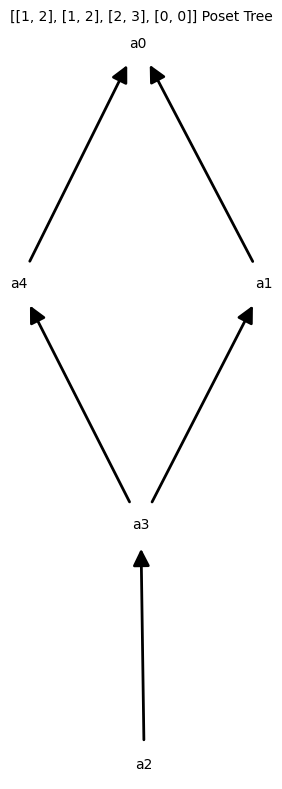

In [17]:
a.plot_poset()

In [18]:
b = Multisegment([Segment(1,1), Segment(1,1), Segment(2,2), Segment(0,0)], segs = True) 
b.compute_less_thans()
d = b.get_less_thans()

a0 = [[1, 1], [1, 1], [2, 2], [0, 0]]
a1 = [[1, 2], [1, 1], [0, 0]]
a2 = [[0, 2], [1, 1]]
a3 = [[1, 2], [0, 1]]
a4 = [[0, 1], [1, 1], [2, 2]]


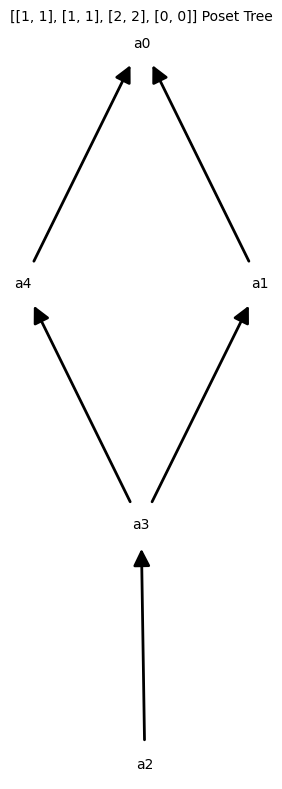

In [19]:

b.plot_poset()

a0 = [[1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0]]
a1 = [[0, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0]]
a2 = [[0, 1], [0, 1], [1, 1], [1, 1], [0, 0]]
a3 = [[0, 1], [0, 1], [0, 1], [1, 1]]


/usr/lib/python3/dist-packages/sage/plot/scatter_plot.py:132: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('None').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  p = subplot.scatter(self.xdata, self.ydata, alpha=options['alpha'],


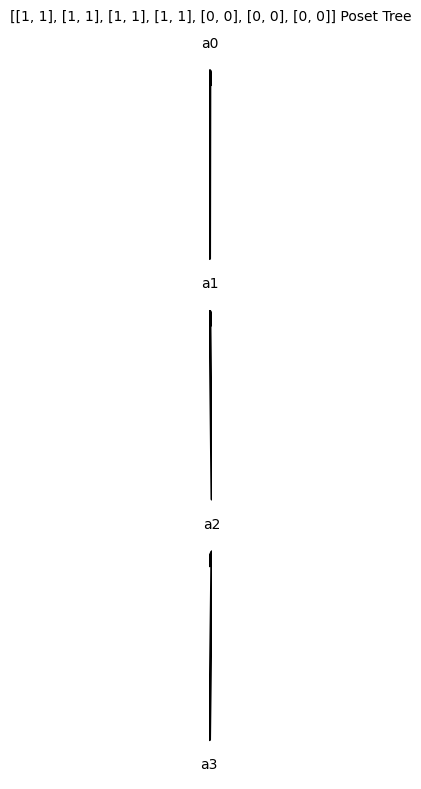

In [7]:
c = Multisegment([Segment(1,1), Segment(1,1), Segment(1,1), Segment(1,1),
                  Segment(0,0), Segment(0,0), Segment(0,0)], segs = True) 
c.plot_poset()

a0 = [[1, 1], [1, 1], [2, 2], [2, 2], [0, 0]]
a1 = [[1, 2], [1, 1], [2, 2], [0, 0]]
a2 = [[0, 2], [1, 1], [2, 2]]
a3 = [[0, 2], [1, 2]]
a4 = [[1, 2], [1, 2], [0, 0]]
a5 = [[1, 2], [0, 1], [2, 2]]
a6 = [[0, 1], [1, 1], [2, 2], [2, 2]]


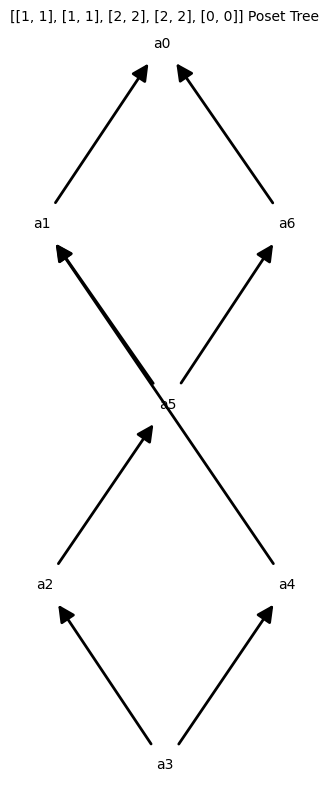

In [21]:
d = Multisegment([Segment(1,1), Segment(1,1), Segment(2,2), Segment(2,2), Segment(0,0)], segs = True) 
d.plot_poset()

a0 = [[1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [2, 2]]
a1 = [[0, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [2, 2]]
a2 = [[0, 2], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0]]
a3 = [[0, 2], [0, 1], [1, 1], [1, 1], [0, 0]]
a4 = [[0, 2], [0, 1], [0, 1], [1, 1]]
a5 = [[0, 1], [0, 1], [1, 1], [1, 1], [0, 0], [2, 2]]
a6 = [[0, 1], [0, 1], [0, 1], [1, 1], [2, 2]]
a7 = [[0, 1], [0, 1], [0, 1], [1, 2]]
a8 = [[0, 1], [0, 1], [1, 2], [1, 1], [0, 0]]
a9 = [[0, 1], [1, 2], [1, 1], [1, 1], [0, 0], [0, 0]]
a10 = [[1, 2], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0]]


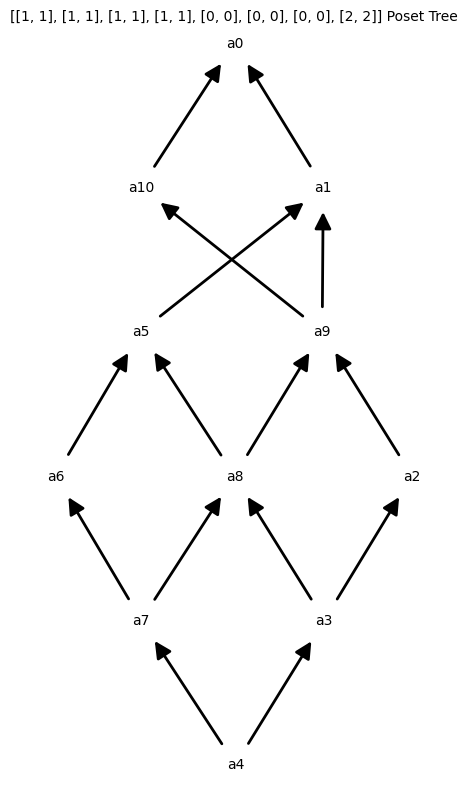

In [22]:
e = Multisegment([Segment(1,1), Segment(1,1), Segment(1,1), Segment(1,1),
                  Segment(0,0), Segment(0,0), Segment(0,0), Segment(2,2)], segs = True) 
e.plot_poset()

a0 = [[1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [2, 2]]
a1 = [[0, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [2, 2]]
a2 = [[0, 2], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0]]
a3 = [[0, 2], [0, 1], [1, 1], [1, 1], [0, 0]]
a4 = [[0, 2], [0, 1], [0, 1], [1, 1]]
a5 = [[0, 1], [0, 1], [1, 1], [1, 1], [0, 0], [2, 2]]
a6 = [[0, 1], [0, 1], [0, 1], [1, 1], [2, 2]]
a7 = [[0, 1], [0, 1], [0, 1], [1, 2]]
a8 = [[0, 1], [0, 1], [1, 2], [1, 1], [0, 0]]
a9 = [[0, 1], [1, 2], [1, 1], [1, 1], [0, 0], [0, 0]]
a10 = [[1, 2], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0]]


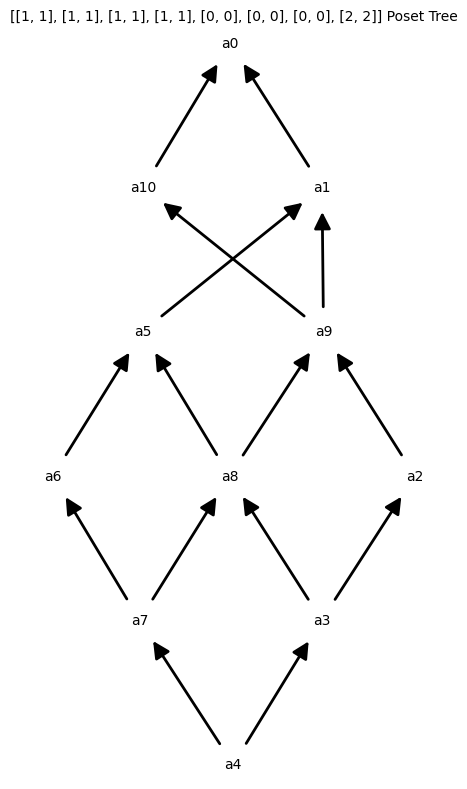

In [23]:
f = Multisegment([(1,1), (1,1), (1,1), (1,1), (0,0), (0,0), (0,0), (2,2)]) 
f.plot_poset()

a0 = [[2, 3], [2, 3], [4, 4], [4, 4], [1, 1], [1, 1]]
a1 = [[2, 4], [2, 3], [4, 4], [1, 1], [1, 1]]
a2 = [[1, 4], [2, 3], [4, 4], [1, 1]]
a3 = [[1, 4], [2, 4], [1, 1]]
a4 = [[1, 4], [1, 4]]
a5 = [[1, 4], [1, 3], [4, 4]]
a6 = [[2, 4], [2, 4], [1, 1], [1, 1]]
a7 = [[2, 4], [1, 3], [4, 4], [1, 1]]
a8 = [[1, 3], [2, 3], [4, 4], [4, 4], [1, 1]]
a9 = [[1, 3], [1, 3], [4, 4], [4, 4]]


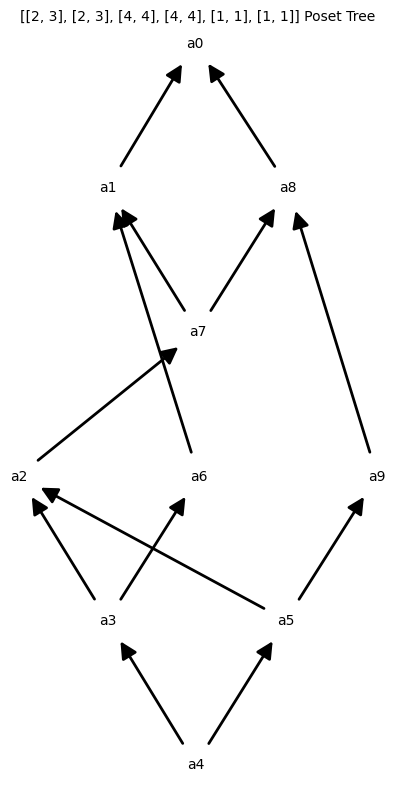

In [22]:
m.plot_poset()

In [10]:
a.get_max()

[[1, 1], [1, 1], [2, 2], [2, 2], [2, 2], [3, 3], [0, 0]]

In [11]:
test = Multisegment([Segment(0,0), Segment(1,1)], segs = True)

In [12]:
test.get_max()

[[0, 0], [1, 1]]